### Contents

[Imports](#Imports)

[bottom](#bottom)

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from os.path import join as pjoin
import sys 
from pathlib import Path
sys.path.insert(0, str(Path(os.getcwd()).parent))
import json 
import orjson
import itertools 
from pprint import pprint
from datetime import datetime, date, timedelta
import requests 
import random
import time
from pprint import pprint
import json 

import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from fabulous import color as fb_color
from PIL import Image
from io import BytesIO
%matplotlib inline

from IPython.display import display, clear_output

In [3]:
ROOT_PATH = str(Path(os.getcwd()).parent)

In [21]:
from src.parse_utils import (
    get_catalog,
    find_card_url,
    get_images_urls_from_card_url
)
from src.utils import (
    get_uniq_items_with_images,
    show_items_images
)
from src.ml.utils import (
    VectorIndex,
    ImageEncoder
)
# image_encoder = ImageEncoder(model_str='google/vit-base-patch16-224-in21k')

In [5]:
matplotlib.rcParams['figure.figsize'] = (7, 7)
sns.set_style('whitegrid')

---

In [6]:
catalog = get_catalog()
pprint(catalog)

[{'id': 1234, 'name': 'Сертификаты Wildberries', 'url': '/gift/certificates'},
 {'childs': [{'id': 8126,
              'name': 'Блузки и рубашки',
              'parent': 306,
              'query': 'cat=8126',
              'seo': 'Женские блузки и рубашки',
              'shard': 'bl_shirts',
              'url': '/catalog/zhenshchinam/odezhda/bluzki-i-rubashki'},
             {'id': 8127,
              'name': 'Брюки',
              'parent': 306,
              'query': 'cat=8127',
              'seo': 'Женские брюки',
              'shard': 'pants',
              'url': '/catalog/zhenshchinam/odezhda/bryuki-i-shorty'},
             {'id': 63010,
              'name': 'Верхняя одежда',
              'parent': 306,
              'query': 'cat=63010',
              'seo': 'Верхняя женская одежда',
              'shard': 'outwear1',
              'url': '/catalog/zhenshchinam/odezhda/verhnyaya-odezhda'},
             {'id': 8130,
              'name': 'Джемперы, водолазки и кардиганы',

In [7]:
all_urls = json.load(open(
    pjoin(ROOT_PATH, 'data/raw_data/all_urls_from_tmux.json')
))
print(f"{len(all_urls):,}")
print(f"{len([category_info for category_info in all_urls if category_info.get('products') is not None]):,}")

2,398
2,264


In [9]:
idxs = [idx for idx, category in enumerate(all_urls) if 'adult' in str(category.get('shard'))]
idxs
[category for idx, category in enumerate(all_urls) if idx in idxs]

[{'category_id': 8174,
  'name': 'Белье и аксессуары',
  'shard': 'adult1',
  'query': 'cat=8174',
  'url': 'https://catalog.wb.ru/catalog/adult1/v2/catalog?ab_testing=false&appType=1&curr=rub&dest=-446116&sort=popular&spp=30&uclusters=0&cat=8174',
  'products': {'193106607': {'card_url': 'https://basket-13.wbbasket.ru/vol1931/part193106/193106607/info/ru/card.json',
    'item_images_urls': ['https://basket-13.wbbasket.ru/vol1931/part193106/193106607/images/big/1.webp',
     'https://basket-13.wbbasket.ru/vol1931/part193106/193106607/images/big/2.webp',
     'https://basket-13.wbbasket.ru/vol1931/part193106/193106607/images/big/3.webp',
     'https://basket-13.wbbasket.ru/vol1931/part193106/193106607/images/big/4.webp',
     'https://basket-13.wbbasket.ru/vol1931/part193106/193106607/images/big/5.webp',
     'https://basket-13.wbbasket.ru/vol1931/part193106/193106607/images/big/6.webp',
     'https://basket-13.wbbasket.ru/vol1931/part193106/193106607/images/big/7.webp']},
   '193023941

In [46]:
# items_metadata = {}
# browse_result_items = json.loads(requests.get(all_urls[idxs[0]]['url']).content)
# for i, item_metadata in tqdm(enumerate(browse_result_items['data']['products'], start=1)):
#     if i % 15 == 0:
#         time.sleep(10)
#     item_id = item_metadata['id']
#     card_url, success_flag = find_card_url(
#         item_id=item_id,
#         max_retries=40,
#         sleep_time=0.1,
#         verbose=False,
#         start_basket_number=10,
#         max_basket_number=30
#     )
#     if success_flag:
#         items_metadata[item_id] = {'card_url': card_url}
#         item_images_urls = get_images_urls_from_card_url(
#             card_url=card_url,
#             n_images=None,
#             verify=True
#         )
#         items_metadata[item_id]['item_images_urls'] = item_images_urls
# pprint(items_metadata)

# # json.dump(items_metadata, open('./raw_data/browse_category.json', mode='w', encoding='utf-8'))

100it [02:59,  1.79s/it]

{2565970: {'card_url': 'https://basket-01.wbbasket.ru/vol25/part2565/2565970/info/ru/card.json',
           'item_images_urls': ['https://basket-01.wbbasket.ru/vol25/part2565/2565970/images/big/1.webp',
                                'https://basket-01.wbbasket.ru/vol25/part2565/2565970/images/big/2.webp',
                                'https://basket-01.wbbasket.ru/vol25/part2565/2565970/images/big/3.webp',
                                'https://basket-01.wbbasket.ru/vol25/part2565/2565970/images/big/4.webp',
                                'https://basket-01.wbbasket.ru/vol25/part2565/2565970/images/big/5.webp',
                                'https://basket-01.wbbasket.ru/vol25/part2565/2565970/images/big/6.webp',
                                'https://basket-01.wbbasket.ru/vol25/part2565/2565970/images/big/7.webp',
                                'https://basket-01.wbbasket.ru/vol25/part2565/2565970/images/big/8.webp',
                                'https://basket-01.wbba

In [9]:
from src.ml.utils import (
    ImageEncoder,
    encode_images
)

/home/aiandrejcev/wb_parsing/wb3.11.4/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
image_encoder = ImageEncoder(model_str='google/vit-base-patch16-224-in21k')
image_encoder.encode(image_url='https://basket-10.wbbasket.ru/vol1572/part157295/157295096/images/big/1.webp')

initializing ImageEncoder...
ok


array([ 1.16129816e-01, -7.97767341e-02,  3.11706841e-01, -1.84357971e-01,
        3.52522731e-01, -2.29039043e-01, -5.19799888e-02,  1.73537627e-01,
        2.19617158e-01, -2.17173137e-02, -3.53218526e-01,  1.07998192e-01,
       -5.57878474e-03, -1.26852944e-01, -2.50834711e-02, -2.08107650e-01,
        8.80188197e-02, -5.76843545e-02,  6.59254789e-02, -2.79149767e-02,
        1.09192289e-01, -2.37345591e-01,  9.08755139e-02, -8.52581188e-02,
        1.21816620e-01, -1.40245140e-01,  6.98255301e-02, -1.06283739e-01,
       -1.55464530e-01, -1.14111438e-01,  2.01131761e-01, -5.81400841e-02,
        1.86530694e-01, -8.00571963e-02,  1.30725414e-01,  2.24788368e-01,
        1.40932441e-01,  3.57788146e-01,  6.54344186e-02, -3.09994407e-02,
        1.48303002e-01,  2.94549763e-01,  8.12367499e-02,  3.33929121e-01,
       -3.12284917e-01,  1.05604708e-01,  2.54594177e-01, -3.17888975e-01,
        1.21808730e-01, -2.78478265e-01, -2.99536139e-01, -7.26858154e-04,
       -3.18446234e-02, -

In [11]:
uniq_items_with_images = get_uniq_items_with_images(
    flatten_categories=all_urls,
    verbose=True
)
print(f"{len(uniq_items_with_images):,}")
pprint({k: v for i, (k, v) in enumerate(uniq_items_with_images.items()) if i <= 2})

flatten_categories: 100%|██████████| 2398/2398 [00:00<00:00, 17349.98it/s]


164,236
{'10147914': ['https://basket-01.wbbasket.ru/vol101/part10147/10147914/images/big/1.webp',
              'https://basket-01.wbbasket.ru/vol101/part10147/10147914/images/big/2.webp',
              'https://basket-01.wbbasket.ru/vol101/part10147/10147914/images/big/3.webp',
              'https://basket-01.wbbasket.ru/vol101/part10147/10147914/images/big/4.webp',
              'https://basket-01.wbbasket.ru/vol101/part10147/10147914/images/big/5.webp',
              'https://basket-01.wbbasket.ru/vol101/part10147/10147914/images/big/6.webp',
              'https://basket-01.wbbasket.ru/vol101/part10147/10147914/images/big/7.webp',
              'https://basket-01.wbbasket.ru/vol101/part10147/10147914/images/big/8.webp',
              'https://basket-01.wbbasket.ru/vol101/part10147/10147914/images/big/9.webp',
              'https://basket-01.wbbasket.ru/vol101/part10147/10147914/images/big/10.webp',
              'https://basket-01.wbbasket.ru/vol101/part10147/10147914/images/big

In [15]:
import orjson

In [16]:
a = {
    "a": np.array([1, 2.01, 3.14]),
    "b": np.array([7, 2, 4, 4, 912, 190])
}
a

{'a': array([1.  , 2.01, 3.14]), 'b': array([  7,   2,   4,   4, 912, 190])}

In [19]:
import orjson
import numpy as np

# Sample dictionary with numpy arrays as values
data = a

# Convert numpy arrays to lists before serializing
data_serializable = {key: value.tolist() for key, value in data.items()}

# Serialize using orjson
json_data = orjson.dumps(data_serializable)

# Save to a file (optional)
with open(pjoin(ROOT_PATH, 'raw_data/tmp.json'), mode='wb') as f:
    f.write(json_data)

# Output JSON string
print(json_data)


b'{"a":[1.0,2.01,3.14],"b":[7,2,4,4,912,190]}'


In [17]:
orjson.(a, open(pjoin(ROOT_PATH, 'raw_data/tmp.json'), mode='w', encoding='utf-8'))

AttributeError: module 'orjson' has no attribute 'dump'

In [17]:
image_encoder = ImageEncoder(model_str='google/vit-base-patch16-224-in21k')

images_embeddings = encode_images(
    images_urls={item_id: images_urls_list for i, (item_id, images_urls_list) in enumerate(uniq_items_with_images.items()) if i <= 5},
    encoder_model=image_encoder,
    verbose=True
)
images_embs_array = np.array([
    emb 
    for item_id, item_image_emb_dict in images_embeddings.items() 
        for image_number, emb in item_image_emb_dict.items()
])
print(f"{len(images_embeddings):,}")
pprint(images_embeddings)

initializing ImageEncoder...
ok


100%|██████████| 6/6 [01:59<00:00, 19.98s/it]


6
{'10147914': {1: array([ 8.68406296e-02, -7.39764720e-02, -1.65750250e-01,  2.77694911e-01,
        4.32136357e-02, -2.84162253e-01, -1.43248647e-01,  9.14499611e-02,
        6.93479702e-02,  2.29205057e-01, -1.56500801e-01,  1.31643742e-01,
        1.43579869e-02,  1.70146730e-02,  1.51082026e-02, -8.84202048e-02,
        2.32519701e-01,  6.03582337e-02,  2.07410812e-01, -2.31377125e-01,
       -2.74654925e-01,  1.62576690e-01, -1.78765982e-01,  2.70680040e-02,
       -9.25945789e-02,  4.02192734e-02, -8.03916156e-02,  4.26337011e-02,
        9.76835713e-02, -9.40180495e-02, -6.07400462e-02,  2.16352284e-01,
       -2.43934587e-01, -2.98117906e-01,  5.02136350e-03, -6.93180263e-02,
       -2.00462326e-01,  1.95576340e-01, -1.83048144e-01, -3.31975847e-01,
       -2.00877130e-01,  1.25121817e-01,  3.87796909e-02,  2.76938379e-01,
       -2.49824643e-01,  2.39521772e-01, -1.23493612e-01, -7.91021734e-02,
       -4.02546465e-01, -1.05339754e-02,  2.08872542e-01, -7.76268020e-02,
      

In [10]:
pjoin(ROOT_PATH, 'data/processed/item_images_embeddings.json')

'/home/aiandrejcev/wb_parsing/data/processed/item_images_embeddings.json'

In [2]:
with open(save_path, mode='rb') as f:
    data = orjson.loads(f.read())

22515

In [19]:
import random
# import numpy as np 

if os.path.exists(pjoin(ROOT_PATH, 'data/processed/tmp.jsonl')):
    os.remove(pjoin(ROOT_PATH, 'data/processed/tmp.jsonl'))
    
for i in range(15):
    random_vec = np.random.normal(size=10)
    res = {f"tmp_item_{random.randint(1, int(1e5))}": random_vec.tolist()}
    with open(pjoin(ROOT_PATH, 'data/processed/tmp.jsonl'), mode='ab') as outfile:
        outfile.write(orjson.dumps(res) + b"\n")

In [23]:
data = []

# Read the JSON lines from the file
with open(pjoin(ROOT_PATH, 'data/processed/tmp.jsonl'), mode='rb') as f:  # 'rb' mode for reading in binary
    for line in f:
        data.append(orjson.loads(line))
data

[{'tmp_item_69046': [-1.3191710476109235,
   0.18997184029415554,
   -1.6627141857838432,
   -0.027188922650236955,
   -0.10796097796587287,
   1.2084949167834433,
   -0.6359035753550233,
   -2.0699462781633535,
   0.5314513610656716,
   1.0102835788203606]},
 {'tmp_item_8484': [0.10312978927415577,
   0.5296883988948651,
   0.20846874465989065,
   0.42448697874562613,
   0.23761036852085443,
   1.3639004564300499,
   1.4873048571922347,
   -0.47468772054959446,
   -0.6278413672399503,
   -1.4047265269291909]},
 {'tmp_item_64723': [-1.9603459468923004,
   1.4468519928559935,
   -0.767124412841025,
   -0.5556035351343505,
   -0.7133318804984319,
   -0.19984186503770526,
   0.22350938760285463,
   -0.12000832681046737,
   0.6076055845702458,
   -1.542332774413757]},
 {'tmp_item_57441': [-0.4140259099812314,
   -0.5425269059367513,
   -0.0984032791073714,
   0.3259545061164804,
   -0.38247839793010635,
   -0.08051511716475905,
   0.26339011625201086,
   1.2097078537396835,
   -0.019869083

In [21]:
with open(pjoin(ROOT_PATH, 'data/processed/tmp.jsonl'), mode='rb') as infile:
    images_embeddings = orjson.loads(infile.read())

JSONDecodeError: unexpected content after document: line 2 column 1 (char 221)

In [20]:
# images_embeddings = with so.open(mapping_target.path, 'rb') as infile:
#         return orjson.loads(infile.read())
# images_embeddings = orjson.loads(open(pjoin(ROOT_PATH, 'data/processed/item_images_embeddings.json'), mode='rb'))
images_embeddings = orjson.loads(open(pjoin(ROOT_PATH, 'data/processed/tmp.jsonl'), mode='rb'))
print(type(images_embeddings))

JSONDecodeError: Input must be bytes, bytearray, memoryview, or str: line 1 column 1 (char 0)

In [33]:
def cosine_similarity(a: np.ndarray, b: np.ndarray) -> float:
    return ((a @ b) / (np.linalg.norm(a) * np.linalg.norm(b))).item()

In [ ]:
'https://basket-10.wbbasket.ru/vol1572/part157295/157295096/images/big/1.webp',
'https://basket-10.wbbasket.ru/vol1572/part157295/157295096/images/big/2.webp',
'https://basket-10.wbbasket.ru/vol1572/part157295/157295096/images/big/3.webp',
'https://basket-10.wbbasket.ru/vol1572/part157295/157295096/images/big/4.webp',
'https://basket-10.wbbasket.ru/vol1572/part157295/157295096/images/big/5.webp',
'https://basket-10.wbbasket.ru/vol1572/part157295/157295096/images/big/6.webp',
'https://basket-10.wbbasket.ru/vol1572/part157295/157295096/images/big/7.webp',
'https://basket-10.wbbasket.ru/vol1572/part157295/157295096/images/big/8.webp'


'https://basket-12.wbbasket.ru/vol1717/part171752/171752342/images/big/1.webp',
'https://basket-12.wbbasket.ru/vol1717/part171752/171752342/images/big/2.webp',
'https://basket-12.wbbasket.ru/vol1717/part171752/171752342/images/big/3.webp',
'https://basket-12.wbbasket.ru/vol1717/part171752/171752342/images/big/4.webp',
'https://basket-12.wbbasket.ru/vol1717/part171752/171752342/images/big/5.webp',
'https://basket-12.wbbasket.ru/vol1717/part171752/171752342/images/big/6.webp',
'https://basket-12.wbbasket.ru/vol1717/part171752/171752342/images/big/7.webp',
'https://basket-12.wbbasket.ru/vol1717/part171752/171752342/images/big/8.webp',
'https://basket-12.wbbasket.ru/vol1717/part171752/171752342/images/big/9.webp'

In [52]:
cosine_similarity(
    a=(model(
        **processor(images=Image.open(requests.get(
            'https://basket-10.wbbasket.ru/vol1572/part157295/157295096/images/big/1.webp', 
            stream=True
        ).raw).convert("RGB"), return_tensors="pt")
    )
    .last_hidden_state[0][0].detach().numpy()),
    b=(model(
        **processor(images=Image.open(requests.get(
            'https://basket-10.wbbasket.ru/vol1572/part157295/157295096/images/big/2.webp', 
            stream=True
        ).raw).convert("RGB"), return_tensors="pt")
    )
    .last_hidden_state[0][0].detach().numpy())
)

0.7537326812744141

In [53]:
cosine_similarity(
    a=(model(
        **processor(images=Image.open(requests.get(
            'https://basket-10.wbbasket.ru/vol1572/part157295/157295096/images/big/1.webp', 
            stream=True
        ).raw).convert("RGB"), return_tensors="pt")
    )
    .last_hidden_state[0][0].detach().numpy()),
    b=(model(
        **processor(images=Image.open(requests.get(
            'https://basket-12.wbbasket.ru/vol1717/part171752/171752342/images/big/1.webp', 
            stream=True
        ).raw).convert("RGB"), return_tensors="pt")
    )
    .last_hidden_state[0][0].detach().numpy())
)

0.527221143245697

In [54]:
cosine_similarity(
    a=(model(
        **processor(images=Image.open(requests.get(
            'https://basket-12.wbbasket.ru/vol1717/part171752/171752342/images/big/2.webp', 
            stream=True
        ).raw).convert("RGB"), return_tensors="pt")
    )
    .last_hidden_state[0][0].detach().numpy()),
    b=(model(
        **processor(images=Image.open(requests.get(
            'https://basket-12.wbbasket.ru/vol1717/part171752/171752342/images/big/1.webp', 
            stream=True
        ).raw).convert("RGB"), return_tensors="pt")
    )
    .last_hidden_state[0][0].detach().numpy())
)

0.8011552691459656

### Building ANN index

```bash
docker run -d -p 6333:6333 \
    -v $(pwd)/qdrant_storage:/qdrant/storage \
    --name qdrant \
    qdrant/qdrant
```

In [ ]:
from src.ml.utils import (
    VectorIndex
)
from src.utils import show_items_images
from src.ml.utils import ImageEncoder

image_encoder = ImageEncoder(model_str='google/vit-base-patch16-224-in21k')

In [54]:
all_urls[2]

{'category_id': 8126,
 'name': 'Блузки и рубашки',
 'shard': 'bl_shirts',
 'query': 'cat=8126',
 'url': 'https://catalog.wb.ru/catalog/bl_shirts/v2/catalog?ab_testing=false&appType=1&curr=rub&dest=-446116&sort=popular&spp=30&uclusters=0&cat=8126',
 'products': {'39565985': {'card_url': 'https://basket-03.wbbasket.ru/vol395/part39565/39565985/info/ru/card.json',
   'item_images_urls': ['https://basket-03.wbbasket.ru/vol395/part39565/39565985/images/big/1.webp',
    'https://basket-03.wbbasket.ru/vol395/part39565/39565985/images/big/2.webp',
    'https://basket-03.wbbasket.ru/vol395/part39565/39565985/images/big/3.webp',
    'https://basket-03.wbbasket.ru/vol395/part39565/39565985/images/big/4.webp',
    'https://basket-03.wbbasket.ru/vol395/part39565/39565985/images/big/5.webp',
    'https://basket-03.wbbasket.ru/vol395/part39565/39565985/images/big/6.webp',
    'https://basket-03.wbbasket.ru/vol395/part39565/39565985/images/big/7.webp',
    'https://basket-03.wbbasket.ru/vol395/part395

In [8]:
uniq_items_with_images = get_uniq_items_with_images(
    flatten_categories=all_urls,
    verbose=True
)
print(f"len(uniq_items_with_images): {len(uniq_items_with_images):,}")
pprint({k: v[:3] for i, (k, v) in enumerate(uniq_items_with_images.items()) if i <= 1})

flatten_categories:   0%|          | 0/2398 [00:00<?, ?it/s]

flatten_categories: 100%|██████████| 2398/2398 [00:00<00:00, 11432.08it/s]

len(uniq_items_with_images): 164,236
{'39565985': ['https://basket-03.wbbasket.ru/vol395/part39565/39565985/images/big/1.webp',
              'https://basket-03.wbbasket.ru/vol395/part39565/39565985/images/big/2.webp',
              'https://basket-03.wbbasket.ru/vol395/part39565/39565985/images/big/3.webp'],
 '80012708': ['https://basket-05.wbbasket.ru/vol800/part80012/80012708/images/big/1.webp',
              'https://basket-05.wbbasket.ru/vol800/part80012/80012708/images/big/2.webp',
              'https://basket-05.wbbasket.ru/vol800/part80012/80012708/images/big/3.webp']}


In [64]:
all_urls[8]

{'category_id': 8134,
 'name': 'Костюмы',
 'shard': 'costumes',
 'query': 'cat=8134',
 'url': 'https://catalog.wb.ru/catalog/costumes/v2/catalog?ab_testing=false&appType=1&curr=rub&dest=-446116&sort=popular&spp=30&uclusters=0&cat=8134',
 'products': {'177703893': {'card_url': 'https://basket-12.wbbasket.ru/vol1777/part177703/177703893/info/ru/card.json',
   'item_images_urls': ['https://basket-12.wbbasket.ru/vol1777/part177703/177703893/images/big/1.webp',
    'https://basket-12.wbbasket.ru/vol1777/part177703/177703893/images/big/2.webp',
    'https://basket-12.wbbasket.ru/vol1777/part177703/177703893/images/big/3.webp',
    'https://basket-12.wbbasket.ru/vol1777/part177703/177703893/images/big/4.webp',
    'https://basket-12.wbbasket.ru/vol1777/part177703/177703893/images/big/5.webp',
    'https://basket-12.wbbasket.ru/vol1777/part177703/177703893/images/big/6.webp',
    'https://basket-12.wbbasket.ru/vol1777/part177703/177703893/images/big/7.webp',
    'https://basket-12.wbbasket.ru/

In [38]:
item_embs_dict = {}
n_images_in_dict = 0
# Read the JSON lines from the file
with open(pjoin(ROOT_PATH, 'data/processed/item_images_embeddings_snapshot.jsonl'), mode='rb') as f:  # 'rb' mode for reading in binary
    for i, line in tqdm(enumerate(f, start=1)):
        current_obj = orjson.loads(line)
        key, val = current_obj.popitem()
        if str(key).endswith('_1'):
            item_embs_dict.update({key: val})
            n_images_in_dict += 1
        if n_images_in_dict == 70_000:
            break
        # if i == 50_000:
        #     break

print(f"len(item_embs_dict): {len(item_embs_dict):,}")
pprint({k: v[:3] for i, (k, v) in enumerate(item_embs_dict.items()) if i <= 1})

333657it [01:42, 3245.02it/s]


len(item_embs_dict): 32,679
{'39565985_1': [-0.01762782409787178,
                0.025827795267105103,
                -0.06148610636591911],
 '80012708_1': [0.016262859106063843,
                -0.11617478728294373,
                -0.033767931163311005]}


In [39]:
payload = ({"item_and_image_number": item_and_image_number, "image_1": uniq_items_with_images.get(item_and_image_number.split('_')[0])[0]} for item_and_image_number, _ in item_embs_dict.items())

In [40]:
from src.ml.utils import (
    VectorIndex
)
from src.utils import show_items_images
from src.ml.utils import ImageEncoder

image_encoder = ImageEncoder(model_str='google/vit-base-patch16-224-in21k')

initializing ImageEncoder...
ok


In [41]:
vector_index = VectorIndex(url="http://localhost:6333", index_name='wb_images_v2')
vector_index.create_index(
    items_vectors=np.array([emb for _, emb in item_embs_dict.items()]),
    payload=payload,
    batch_size=128,
)
vector_index

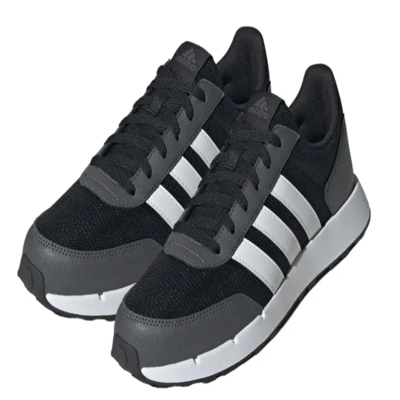

In [73]:
image_url = (
    # "https://github.com/user-attachments/assets/d6e4c1da-8e17-4c6d-81a1-7b9bb796c4c8"
    # "https://github.com/user-attachments/assets/204d6b77-5d38-421e-81a3-a1ce3a07a482"
    # "https://github.com/user-attachments/assets/4a2d0a0b-599f-49e1-b6dd-9db168bcfa59"
    # "https://github.com/user-attachments/assets/67d11201-ff5f-4b23-a5bc-0b8173439b7d"   
    # "https://github.com/user-attachments/assets/a2555108-e8c5-4a55-8c60-3d81799516bf" # cup
    # "https://github.com/user-attachments/assets/3f794b46-e2ed-4de3-9e8e-5105cdbf76b7" # yarik costume
    # "https://github.com/user-attachments/assets/4d4739c6-4c3f-4485-98a5-0fc9066050df" # Amira on hourse costume
)
show_items_images(
    items_images_list=[image_url],
    image_size=(400, 400),
)

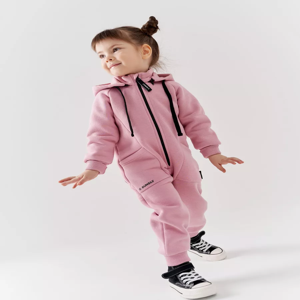

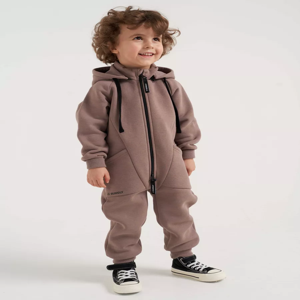

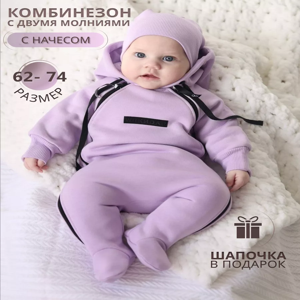

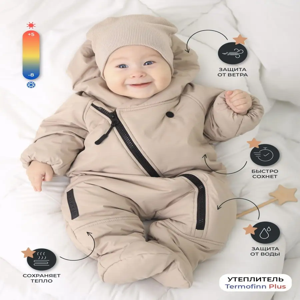

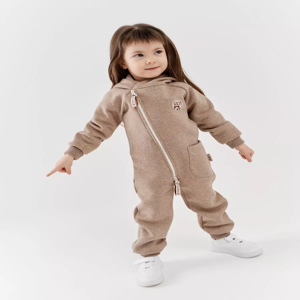

[{'item_and_image_number': '200613182_1',
  'image_1': 'https://basket-13.wbbasket.ru/vol2006/part200613/200613182/images/big/1.webp'},
 {'item_and_image_number': '200478226_1',
  'image_1': 'https://basket-13.wbbasket.ru/vol2004/part200478/200478226/images/big/1.webp'},
 {'item_and_image_number': '201347496_1',
  'image_1': 'https://basket-13.wbbasket.ru/vol2013/part201347/201347496/images/big/1.webp'},
 {'item_and_image_number': '125855549_1',
  'image_1': 'https://basket-09.wbbasket.ru/vol1258/part125855/125855549/images/big/1.webp'},
 {'item_and_image_number': '174379309_1',
  'image_1': 'https://basket-12.wbbasket.ru/vol1743/part174379/174379309/images/big/1.webp'}]

In [71]:
results = vector_index.search(
    image_url=image_url,
    image_encoder=image_encoder,
    top_n_results=5,
    show_results=True
)
results

In [57]:
# json.dump(results, open(pjoin(ROOT_PATH, 'data/tmp/results.json'), mode='w', encoding='utf-8'))

### bottom